# PROJECT


##### This project has two Sections

##### The first Section gives an overview on what the scientific rersearch tells us about the climate warming, its predictions on the GreenHouse gas emissions, the carbon prices and the energy mix by the end of the century.
##### The second Section analyses the Carbon Majors emissions compared to the World carbon emissions.


In [ ]:
## First Section: IAMC 1.5°C and NGFS Scenario Explorer

##### The IIASA is an international scientific institute that conducts research into the critical issues of global environmental, economic, technological, and social change in the twenty-first century.
##### Once you create a user account and it is activated by the IIASA Energy Profram Authentification Service, you have access to suite of Scenario Explorer instances and related infrastructure to support analysis of integrated-assessment pathways in IPCC reports and model comparison projects.
##### Over the past decade, the Integrated Assessment Modeling Consortium (IAMC) developed a standardised tabular timeseries format to exchange scenario data related to energy systems modelling, land-use change, demand sectors, and economic indicators in the context of the Sustainable Development Goals.

### Sub-Section 1: Visualization of 6 main scenarios using the IAMC 1.5°C Scenario Explorer REMIND model
##### 1- CD-LINKS_NPi2020_400: NPi scenario until 2020 with a transition to a globally cost-effective implementation of a carbon budget for the period 2011-2100 of 400 GtCO2 afterwards, corresponding to a chance of >66% for staying below 1.5C in 2100
##### It is the most favorable scenario although it includes a significant increase in the price of carbon.

##### 2- CD-LINKS_NPi2020_1000: NPi scenario until 2020 with a transition to a globally cost-effective implementation of a carbon budget for the period 2011-2100 of 1000 GtCO2 afterwards,corresponding to staying below 2C at >66% through the 21st century
##### 3- CD-LINKS_NPi2020_1600: NPi scenario until 2020 with a transition to a globally cost-effective implementation of a carbon budget for the period 2011-2100 of 1600 GtCO2 afterwards, corresponding to staying below 2C at >50% through the 21st century


##### 4- CD-LINKS_INDCi: Intended Nationally Determined Contributions (INDC) scenario that implements the first round of INDCs until 2030 and extrapolates the implied effort beyond 2030
##### 5- CD-LINKS_NPi: National Policies implemented scenario includes currently implemented climate, energy and land policies and extrapolates the implied effort beyond the direction of the policies
##### 6- CD-LINKS_NoPolicy: Baseline scenario without any climate policy in place

### Sub-Section 2: Visualization of 3 main  models scenarios using NGFS Scenario Explorer Net Zero 2050 scenario
##### 1- Global Change Assessment Model 5.3 - GCAM5.3_NGFS
##### The core operating principle for GCAM is that of market equilibrium. Representative agents in GCAM use information on prices, as well as other information that might be relevant, and make decisions about the allocation of resources. These representative agents exist throughout the model, representing, for example, regional electricity sectors, regional refining sectors, regional energy demand sectors, and land users who have to allocate land among competing crops within any given land region. Markets are the means by which these representative agents interact with one another. All markets are solved simultaneously. Agents pass goods and services along with prices into the markets. Markets exist for physical flows such as electricity or agricultural commodities, but they also can exist for other types of goods and services, for example tradable carbon permits.

##### 2- MESSAGEix-GLOBIOM 1.1
##### Hybrid model (energy engineering and land use partial equilibrium models soft-linked to macro-economic general equilibrium model)

##### 3- REMIND 2.1 – MAgPIE 4.2
##### REMIND: Hybrid model that couples an economic growth model with a detailed energy system model and a simple climate model.

##### MAgPIE: Gridded land use model with economic regions. Coupled to the grid-based dynamic vegetation model LPJmL providing gridded input on potential crop yields, water availability and terrestrial carbon content under various climate conditions.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [333]:
### Connecting to a data resource (aka the database API of a Scenario Explorer instance)
#### Install pyam
!pip install -e git+https://github.com/IAMconsortium/pyam.git#egg=pyam
    
# Import the packages
import pandas as pd
import pyam
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

#Connect to the various scenarios to explore the data resource
conn = pyam.iiasa.Connection()
conn.valid_connections
conn = pyam.iiasa.Connection('iamc15')

# There are 25 models in this Scenario Explorer instance
conn.models()
# 177 scenarios
conn.scenarios()

pyam.iiasa - INFO: You are connected as an anonymous user


Obtaining pyam from git+https://github.com/IAMconsortium/pyam.git#egg=pyam
  Updating c:\users\gerar\data\ucd\src\pyam clone
  Attempting uninstall: pyam-iamc
    Found existing installation: pyam-iamc 0.12.0+3.ge7828be
    Uninstalling pyam-iamc-0.12.0+3.ge7828be:
      Successfully uninstalled pyam-iamc-0.12.0+3.ge7828be
  Running setup.py develop for pyam-iamc


pyam.iiasa - INFO: You are connected to the IXSE_SR15 scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ene.iiasa.ac.at/iamc-1.5c-explorer/#/about
pyam.iiasa - INFO: You are connected as an anonymous user


0             ADVANCE_2020_1.5C-2100
1                 ADVANCE_2020_Med2C
2                  ADVANCE_2020_WB2C
3                 ADVANCE_2030_Med2C
4             ADVANCE_2030_Price1.5C
                   ...              
172                     SMP_REF_Sust
173                             CEDS
174    IEA Energy Statistics (r2017)
175                              Sky
176                          SSP4-19
Name: scenario, Length: 177, dtype: object

### Sub-Section 1: Visualization of 6 main scenarios using the IAMC 1.5°C Scenario Explorer REMIND model

### Prediction of the Temperature using REMIND-MAgPIE 1.7-3.0 model

##### The more favourable scenario, CD-LINKS_NPi2020_400, predicts a Global Mean Temperature of 1.5°C in 2100
##### The less favourable scenario, CD-LINKS_NoPolicy, predicts a Global Mean Temperature of 4.5°C in 2100
##### In between there are various options based on different carbon budgets 

pyam.iiasa - INFO: You are connected to the IXSE_SR15 scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ene.iiasa.ac.at/iamc-1.5c-explorer/#/about
pyam.iiasa - INFO: You are connected as an anonymous user


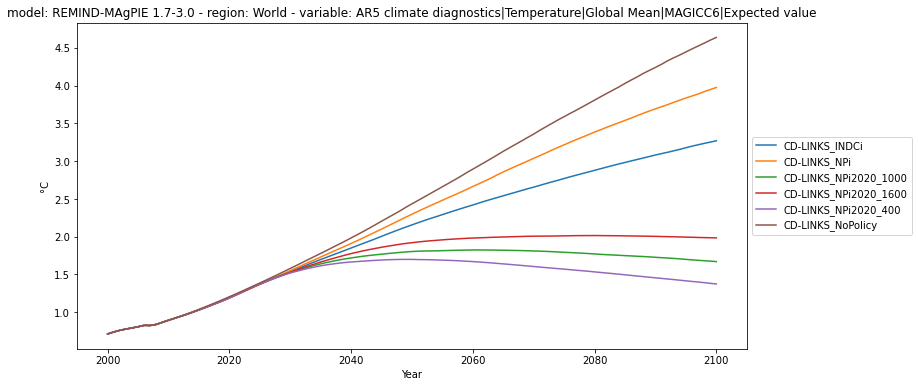

In [334]:
# Initialize a Connection instance and search for the Temperature from the IAMC 1.5°C Scenario Explorer hosted by IIASA, using the REMIND model for the whole world
df_temp = pyam.read_iiasa(
    'iamc15',
    model='REMIND*',
    variable=['Diagnostics|Temperature|Global Mean|MAGICC6|MED','AR5 climate diagnostics|Temperature|Global Mean|MAGICC6|Expected value'],
    region='World'
)

# Plot the predictions
ax = df_temp.filter(model='REMIND-MAgPIE 1.7-3.0',
                      scenario='CD*',
                      variable= 'AR5 climate diagnostics|Temperature|Global Mean|MAGICC6|Expected value').plot(figsize=(12,6), legend=dict(loc='center left', bbox_to_anchor=(1.0, 0.5)))

### Prediction of the CO2 Emissions using REMIND-MAgPIE 1.7-3.0 model

##### The more favourable scenario, CD-LINKS_NPi2020_400, predicts large negative CO2 emissions by 2100
##### The less favourable scenario, CD-LINKS_NoPolicy, predicts a level above 60 Billion tons CO2 by 2100
##### In between there are various options based on different carbon budgets 

pyam.iiasa - INFO: You are connected to the IXSE_SR15 scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ene.iiasa.ac.at/iamc-1.5c-explorer/#/about
pyam.iiasa - INFO: You are connected as an anonymous user


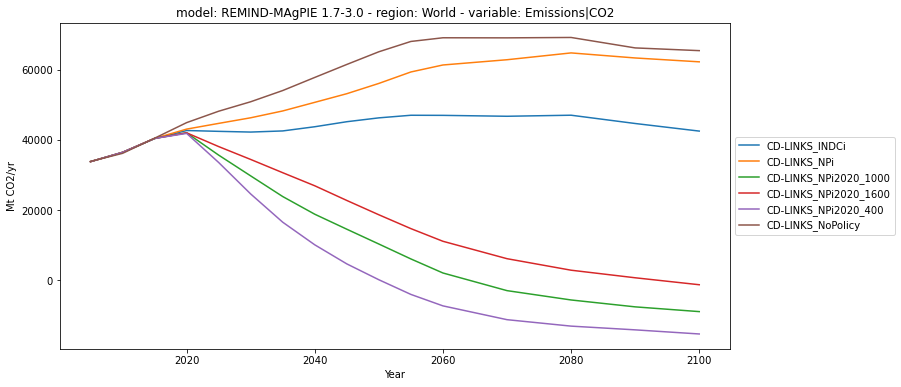

In [335]:
# Initialize a new Connection instance and search for the CO2 Emissions from the IAMC 1.5°C Scenario Explorer hosted by IIASA, using the REMIND model for the whole world
df_co2 = pyam.read_iiasa(
    'iamc15',
    model='REMIND*',
    variable=['Emissions|CO2'],
    region='World'
)

# Plot the predictions
ax = df_co2.filter(model='REMIND-MAgPIE 1.7-3.0',
                      scenario='CD*',
                      variable= 'Emissions|CO2').plot(figsize=(12,6), legend=dict(loc='center left', bbox_to_anchor=(1.0, 0.5)))

### Prediction of the Price Carbon using REMIND-MAgPIE 1.7-3.0 model

##### The more favourable scenario, CD-LINKS_NPi2020_400, predicts large increase in Price Carbon up to USD1400 by 2100 to achieve net zero
##### The less favourable scenario, CD-LINKS_NoPolicy, predicts a level around USD0 until 2100 as it has always been the case in the past
##### In between there are various options based on different carbon budgets 

pyam.iiasa - INFO: You are connected to the IXSE_SR15 scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ene.iiasa.ac.at/iamc-1.5c-explorer/#/about
pyam.iiasa - INFO: You are connected as an anonymous user


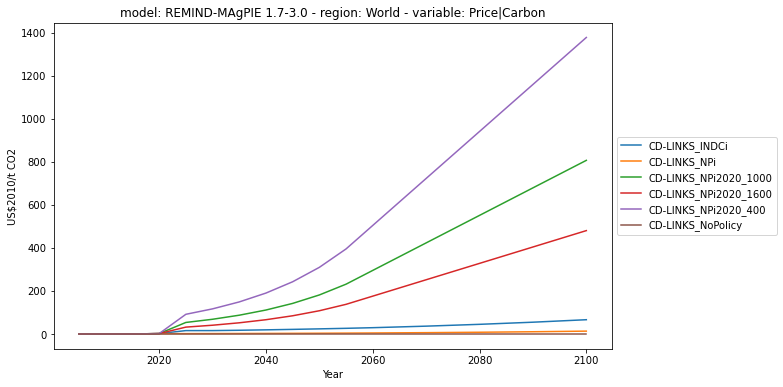

In [336]:
# Initialize a new Connection instance and search for the price of carbon from the IAMC 1.5°C Scenario Explorer hosted by IIASA, using the REMIND model for the whole world
df_price = pyam.read_iiasa(
    'iamc15',
    model='REMIND*',
    variable=['Price|Carbon'],
    region='World'
)

#Plot the predictions
ax = df_price.filter(model='REMIND-MAgPIE 1.7-3.0',
                      scenario='CD*',
                      variable= 'Price|Carbon').plot(figsize=(10,6), legend=dict(loc='center left', bbox_to_anchor=(1.0, 0.5)))

### Sub-Section 2: Visualization of 3 main  models scenarios using NGFS Scenario Explorer Net Zero 2050 scenario

In [322]:
# Initialize a new Connection instance and search for the energy investment from the NGFS Scenario Explorer hosted by IIASA
conn = pyam.iiasa.Connection()
conn.valid_connections
conn2 = pyam.iiasa.Connection('ngfs')

conn2.models()

# this package helps to visualize the legend out of the plot
from pyam.plotting import OUTSIDE_LEGEND

pyam.iiasa - INFO: You are connected as an anonymous user
pyam.iiasa - INFO: You are connected to the IXSE_NGFS scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ene.iiasa.ac.at/ngfs/#/about
pyam.iiasa - INFO: You are connected as an anonymous user


In [ ]:
### Prediction of the CO2 Emissions using NGFS Scenario Explorer Net Zero 2050 scenario

##### The more favourable scenario,GCAM5.3_NGFS, predicts net zero by 2050 and then significantly negative until 2100
##### MESSAGEix-GLOBIOM 1.1 and REMIND 2.1 – MAgPIE 4.2 predict net zero not before 2060 with no change thereafter

pyam.iiasa - INFO: You are connected to the IXSE_NGFS scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ene.iiasa.ac.at/ngfs/#/about
pyam.iiasa - INFO: You are connected as an anonymous user


<AxesSubplot:title={'center':'scenario: Net Zero 2050 - region: World - variable: Emissions|CO2'}, xlabel='Year', ylabel='Mt CO2/yr'>

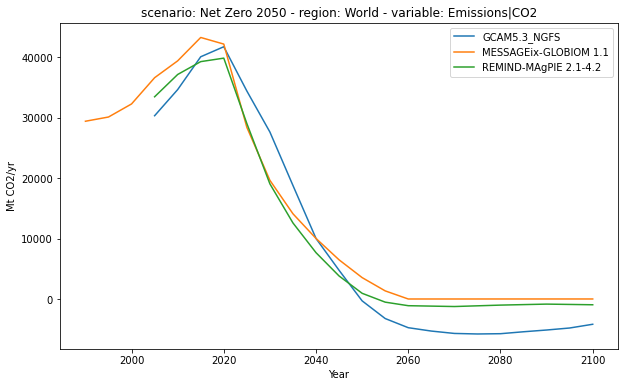

In [324]:
# Initialize a new Connection instance and search for the CO2 Emissions from the NGFS Scenario Explorer hosted by IIASA, using the GCAM5/MESSAGEix-GLOBIOM/REMIND models and Net Zero 2050 Scenario for the whole world
df_co2_ngfs = pyam.read_iiasa(
    'ngfs',
    model= ['GCAM5.3_NGFS', 'MESSAGEix-GLOBIOM 1.1', 'REMIND-MAgPIE 2.1-4.2'] ,   
    scenario= 'Net Zero 2050',     
    variable='Emissions|CO2',
    region='World'
)
              
#Plot the predictions
df_co2_ngfs.filter(variable= 'Emissions|CO2').plot(figsize=(10,6))

### Prediction of the Price Carbon using NGFS Scenario Explorer Net Zero 2050 scenario

##### The more favourable scenario, GCAM5.3_NGFS, predicts large increase in Price Carbon up to USD3000 by 2100 to achieve net zero
##### REMIND 2.1 – MAgPIE 4.2 predicts predicts a level a bit below USD1000 until 2100 
##### MESSAGEix-GLOBIOM 1.1 predicts a level below USD500 by 2100

pyam.iiasa - INFO: You are connected to the IXSE_NGFS scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ene.iiasa.ac.at/ngfs/#/about
pyam.iiasa - INFO: You are connected as an anonymous user


<AxesSubplot:title={'center':'scenario: Net Zero 2050 - region: World - variable: Price|Carbon'}, xlabel='Year', ylabel='US$2010/t CO2'>

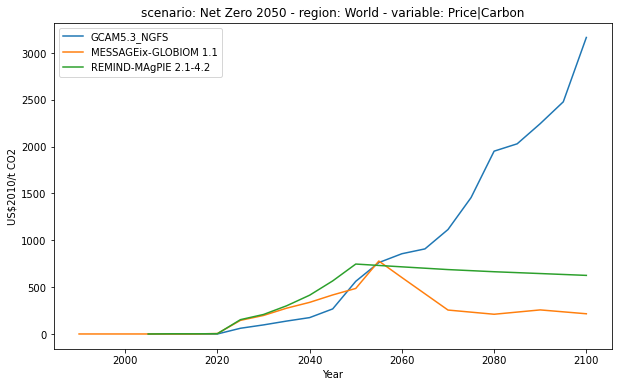

In [325]:
# Initialize a new Connection instance and search for the Price Carbon from the NGFS Scenario Explorer hosted by IIASA, using the GCAM5/MESSAGEix-GLOBIOM/REMIND models and Net Zero 2050 Scenario for the whole world
df_co2_ngfs = pyam.read_iiasa(
    'ngfs',
    model= ['GCAM5.3_NGFS', 'MESSAGEix-GLOBIOM 1.1', 'REMIND-MAgPIE 2.1-4.2'] ,    
    scenario= 'Net Zero 2050',    
    variable='Price|Carbon',
    region='World'
)
              
#Plot the predictions
df_co2_ngfs.filter(variable= 'Price|Carbon').plot(figsize=(10,6))

### Prediction of the Investment Energy Supply using NGFS Scenario Explorer Net Zero 2050 scenario

##### The winners are Solar, Wind and Transmission and Distribution for the 3 models
##### The loosers are clearly Oil, Gas and Coal 

pyam.iiasa - INFO: You are connected to the IXSE_NGFS scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ene.iiasa.ac.at/ngfs/#/about
pyam.iiasa - INFO: You are connected as an anonymous user


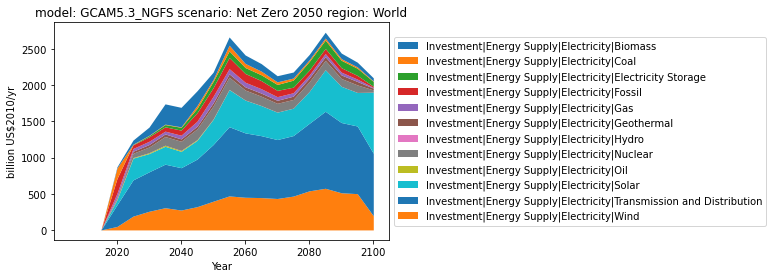

In [328]:
# Initialize a new Connection instance and search for the Investment Energy Supply from the NGFS Scenario Explorer hosted by IIASA, using the GCAM5/MESSAGEix-GLOBIOM/REMIND models and Net Zero 2050 Scenario for the whole world
df_energy_inv = pyam.read_iiasa(
    'ngfs',
    model= ['GCAM5.3_NGFS', 'MESSAGEix-GLOBIOM 1.1', 'REMIND-MAgPIE 2.1-4.2'] ,     
    scenario= 'Net Zero 2050',     
    variable=['Investment|Energy Supply|*'],
    region='World'
)

#Plot the predictions for the GCAM5.3_NGFS model
var_list = ['Investment|Energy Supply|Electricity|Biomass', 'Investment|Energy Supply|Electricity|Coal', 'Investment|Energy Supply|Electricity|Electricity Storage',
            'Investment|Energy Supply|Electricity|Fossil','Investment|Energy Supply|Electricity|Gas', 'Investment|Energy Supply|Electricity|Geothermal', 'Investment|Energy Supply|Electricity|Hydro',
            'Investment|Energy Supply|Electricity|Nuclear', 'Investment|Energy Supply|Electricity|Oil', 'Investment|Energy Supply|Electricity|Solar',
            'Investment|Energy Supply|Electricity|Transmission and Distribution','Investment|Energy Supply|Electricity|Wind']
ax = df_energy_inv.filter(model= 'GCAM5.3_NGFS',variable=var_list).plot.stack(legend=OUTSIDE_LEGEND['right'])

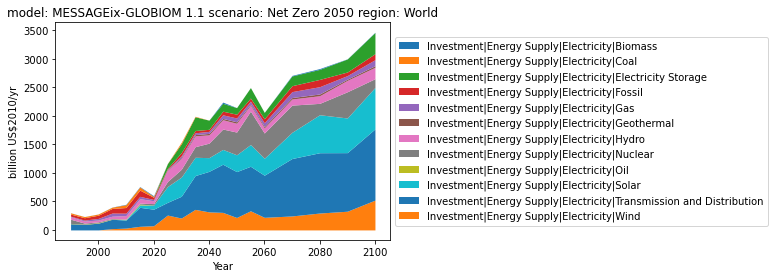

In [330]:
##Plot the predictions for the MESSAGEix-GLOBIOM 1.1 model
ax = df_energy_inv.filter(model= 'MESSAGEix-GLOBIOM 1.1',variable=var_list).plot.stack()

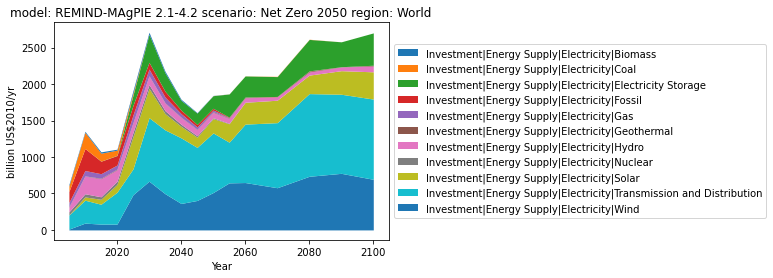

In [331]:
##Plot the predictions for the MESSAGEix-GLOBIOM 1.1 model
ax = df_energy_inv.filter(model= 'REMIND-MAgPIE 2.1-4.2',variable=var_list).plot.stack()

## Second Section: Exploratoy Data Analysis of the Carbon Majors database established by Rick Heede of the Climate Accountability Institute

In [293]:
#Read the data from the csv file extracted from the Carbon Majors database established by Rick Heede of the Climate Accountability Institute
Emissions = pd.read_csv("Majors.csv", header=0, index_col=0)

#Convert the index of years into a datetime object using pd.to_datetime(), and since the data is annual, pass the argument format='%Y'.
Emissions.index = pd.to_datetime(Emissions.index, format='%Y')

#Create the Carbone Majors Data set excluding the data for the World
CarbonMajors = Emissions.drop('World', axis=1)

#Create a Series of the Carbon Majors emissions by year
CarbonMajors_Year = CarbonMajors.sum(axis=1)

#Rename the column of the values 'CarbonMajors'
CarbonMajors_Year = CarbonMajors_Year.to_frame('CarbonMajors')

#Create a Series of the Carbon Majors Cumulated emissions by year
CarbonMajors_CumulYear = CarbonMajors.sum(axis=1).cumsum()


#Rename the column of the values 'CarbonMajors'
CarbonMajors_CumulYear = CarbonMajors_CumulYear.to_frame('CarbonMajors')

### Three Periods appear: From 1870 to 1950, from 1950 to 1980 and from 1980 to 2018

##### Carbon Majors Emissions are the Main contributers to World Carbon Dioxide and Methane emissions since 1870
##### The spread between World emissions and Carbon Majors emissions remain relatively close to 5 billion tons except at the beginning of the 1st period
##### 70% of Cumulative World Carbon Dioxide and Methane emissions since 1870 are due to Carbon Majors 

Text(0.5, 1.0, 'Cumulative Carbon Dioxide and Methane Emissions since 1870')

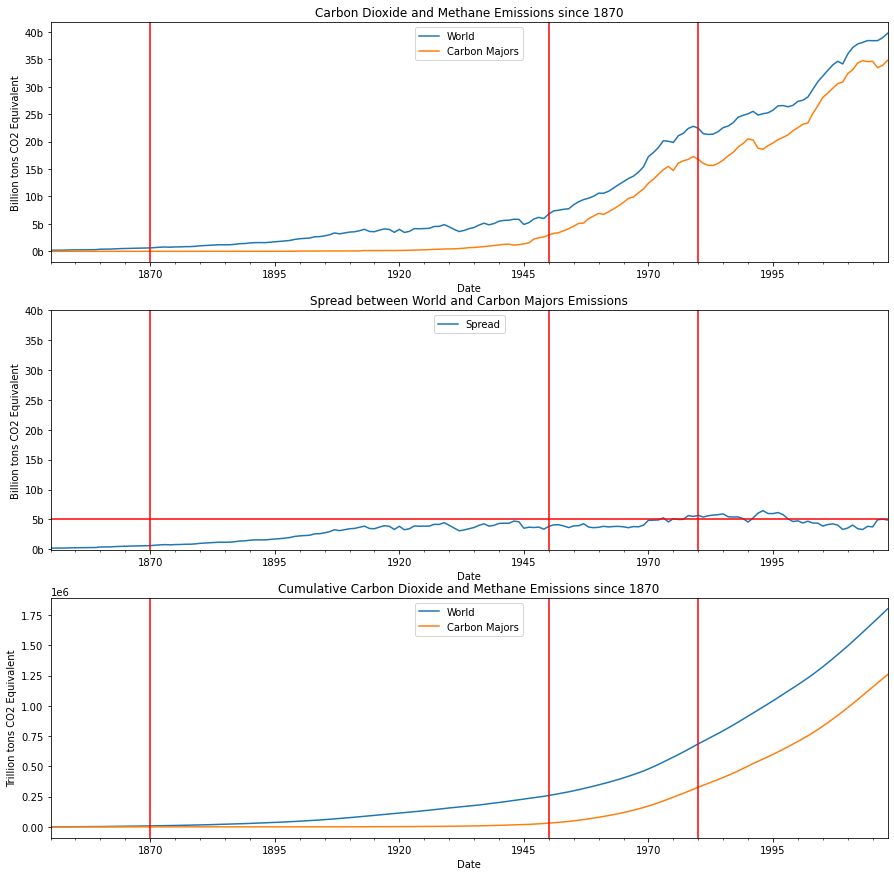

In [294]:
# Plot the emissions per year
plt.subplot(3,1,1)
Emissions['World'].plot(label='World', figsize=(15, 15))
CarbonMajors_Year['CarbonMajors'].plot(label='Carbon Majors',figsize=(15, 15))
plt.axvline('1870', color='r')
plt.axvline('1950', color='r')
plt.axvline('1980', color='r')
plt.legend(loc="upper center")
plt.yticks([0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000],['0b', '5b', '10b', '15b', '20b', '25b','30b', '35b', '40b'])
plt.ylabel('Billion tons CO2 Equivalent')
plt.title('Carbon Dioxide and Methane Emissions since 1870')

# Plot the spread
plt.subplot(3,1,2)
Spread = Emissions['World']-CarbonMajors_Year['CarbonMajors']
Spread.plot(label='Spread', figsize=(15, 15))
plt.axvline('1870', color='r')
plt.axvline('1950', color='r')
plt.axvline('1980', color='r')
plt.axhline(y=5000, color='r', linestyle='-')
plt.legend(loc="upper center")
plt.yticks([0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000],['0b', '5b', '10b', '15b', '20b', '25b','30b', '35b', '40b'])
plt.ylabel('Billion tons CO2 Equivalent')
plt.title('Spread between World and Carbon Majors Emissions')


#Plot the cumulative Emissions
plt.subplot(3,1,3)
Emissions['World'].cumsum().plot(label='World', figsize=(15, 15))
CarbonMajors_CumulYear['CarbonMajors'].plot(figsize=(15,15), label='Carbon Majors')
plt.axvline('1870', color='r')
plt.axvline('1950', color='r')
plt.axvline('1980', color='r')
plt.legend(loc="upper center")
plt.ylabel('Trillion tons CO2 Equivalent')
plt.title('Cumulative Carbon Dioxide and Methane Emissions since 1870')

### Statistics on Carbon Majors Emissions for the 3 periods [1870 - 1950] [1950 - 1980] [1980 - 2018]

##### The mean has increased from 0.28 B tons in the first period of 100 years, to 9.45 B in the second of 30 years, and up to 24.29 B in the third of 39 years
##### 75% of Carbon Majors emissions increased from 0.26 B in the 1st period, to 13.79 B in the 2nd, and 30.72 B in the third
##### The maximum has increased from 2.61 B tons in the 1st period, to 17.30 B in the 2nd, and up to 34.83 B in the third

In [295]:
#Convert Data Series into DataFrame before running the statistics
CarbonMajorsYear = pd.DataFrame(CarbonMajors_Year)
print("Statistics Period 1870-1950", CarbonMajorsYear['1870':'1949'].describe())
print("Statistics Period 1950-1980", CarbonMajorsYear['1950':'1979'].describe())
print("Statistics Period 1980-2018", CarbonMajorsYear['1980':'2018'].describe())

Statistics Period 1870-1950        CarbonMajors
count     80.000000
mean     349.860800
std      574.969643
min        1.456000
25%        5.900000
50%       66.600000
75%      426.150000
max     2612.200000
Statistics Period 1950-1980        CarbonMajors
count     30.000000
mean    9450.116667
std     4678.368021
min     2977.400000
25%     5360.250000
50%     8621.800000
75%    13794.475000
max    17300.400000
Statistics Period 1980-2018        CarbonMajors
count     39.000000
mean   24292.512821
std     6748.503602
min    15646.600000
25%    18907.200000
50%    21962.800000
75%    30720.300000
max    34832.600000


### Histograms on Carbon Majors Emissions for the 3 periods [1870 - 1950] [1950 - 1980] [1980 - 2018]

##### The most frequent values of Carbon Emissions clearly moved from the lower bins to the highest bins since 1870

Text(0.5, 1.0, 'From 1980 to 2018')

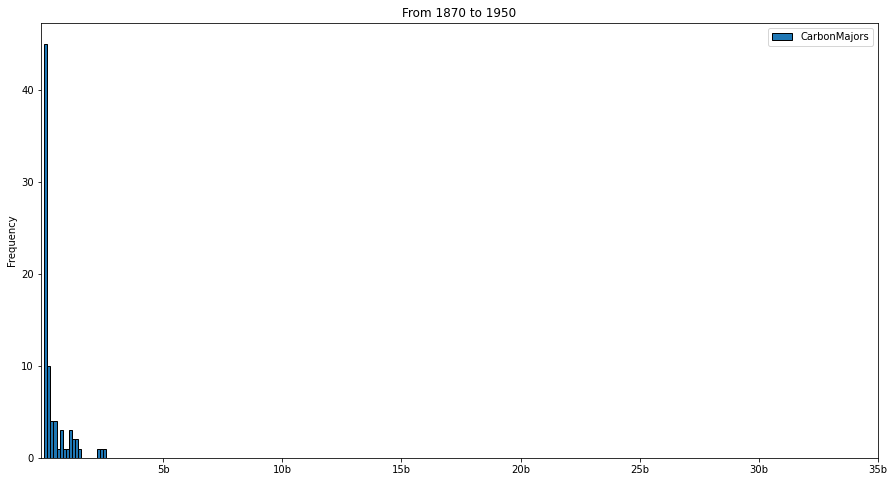

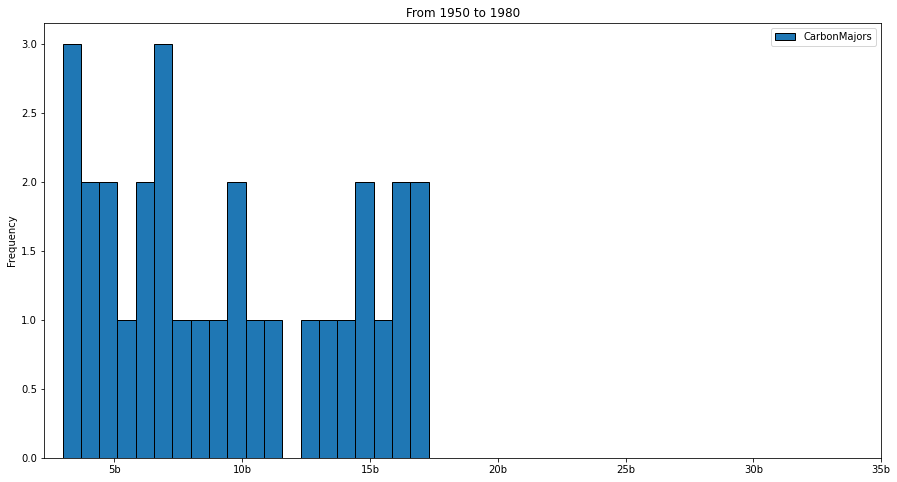

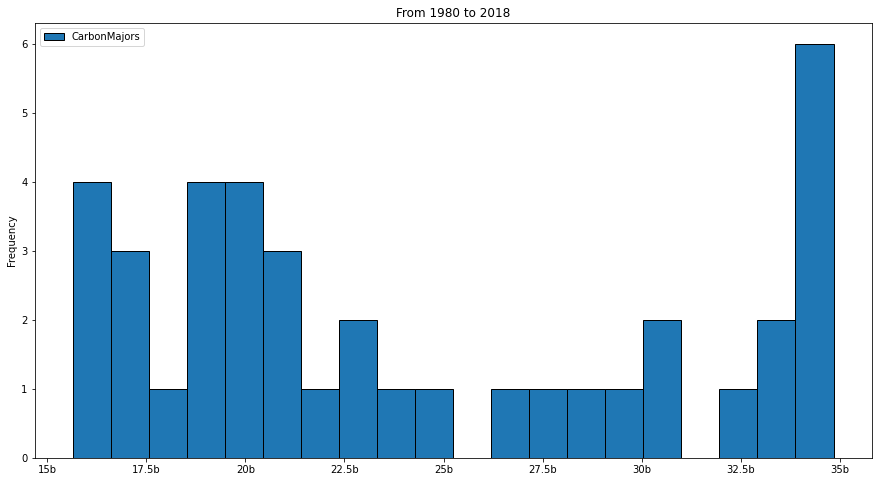

In [296]:
CarbonMajors_Year['1870':'1949'].plot(kind="hist", bins=20, edgecolor='black', figsize=(15, 8))
plt.xticks([5000, 10000, 15000, 20000, 25000, 30000, 35000],['5b', '10b', '15b', '20b', '25b','30b', '35b'])
plt.title('From 1870 to 1950')

CarbonMajors_Year['1950':'1979'].plot(kind="hist", bins=20, edgecolor='black', figsize=(15, 8))
plt.xticks([5000, 10000, 15000, 20000, 25000, 30000, 35000],['5b', '10b', '15b', '20b', '25b','30b', '35b'])
plt.title('From 1950 to 1980')

CarbonMajors_Year['1980':'2018'].plot(kind="hist", bins=20, edgecolor='black',figsize=(15, 8))
plt.xticks([15000, 17500, 20000, 22500, 25000, 27500, 30000, 32500, 35000],['15b', '17.5b', '20b', '22.5b', '25b', '27.5b','30b', '32.5b', '35b'])
plt.title('From 1980 to 2018')

### Change in Carbon Emissions since 1850

##### The change in Carbon Majors Emissions seems to be reverting around the change in World Carbon Emissions

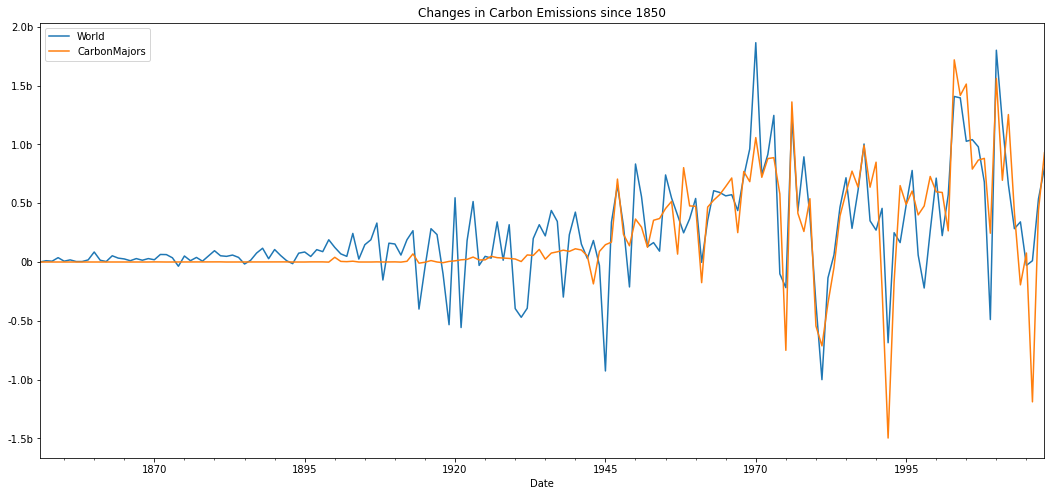

In [85]:
#Create the different periods by slicing the 'Emissions' Dataset for the World and the 'CarbonMajors_Year' for the Carbon Majors
y = Emissions.loc['1850':'2018'][['World']].diff().dropna()
x = CarbonMajors_Year['CarbonMajors'].loc['1850':'2018'].diff().dropna()

y.plot(label='World', figsize=(18,8))
x.plot(label="CarbonMajors", figsize=(18,8))

plt.yticks([-1500, -1000, -500, 0, 500, 1000, 1500, 2000],['-1.5b', '-1.0b', '-0.5b', '0b', '0.5b','1.0b', '1.5b', '2.0b'])
plt.title('Changes in Carbon Emissions since 1850')
plt.legend()
plt.show()

### Correlation between World and Carbon Majors Carbon Emissions

##### A first estimate shows a 99% correlation for the whole period and for the levels of emissions
##### A more precise analysis shows that the changes in  World and Carbon Majors emissions have a correlation of 23%, 71% and 78% for the periods 1870-1950, 1950-1980 and 1980-2018 respectively
##### The correlation was not clear in the first period but is becoming more and more positive in the last two periods

In [300]:
#Usethe corr() function to compute the correlation between World data and Carbon Majors data

#From 1850 to 2018
correlation = Emissions['World'].corr(CarbonMajors_Year['CarbonMajors'])
print("Correlation between World and Carbon Majors Carbon Emissions since 1850: ", correlation)

#From 1870 to 1950
changes_1870 = Emissions.loc['1870':'1949'][['World']].diff().dropna()
changes_1870_M = CarbonMajors_Year['CarbonMajors'].loc['1870':'1949'].diff().dropna()
## Add new column to DataFrame changes_1870
changes_1870['Majors'] = changes_1870_M

#From 1950 to 1980
changes_1950 = Emissions.loc['1950':'1979'][['World']].diff().dropna()
changes_1950_M = CarbonMajors_Year['CarbonMajors'].loc['1950':'1979'].diff().dropna()
## Add new column to DataFrame changes_1950
changes_1950['Majors'] = changes_1950_M

#From 1980 to 2018
changes_1980 = Emissions.loc['1980':'2018'][['World']].diff().dropna()
changes_1980_M = CarbonMajors_Year['CarbonMajors'].loc['1980':'2018'].diff().dropna()
## Add new column to DataFrame changes_1980
changes_1980['Majors'] = changes_1980_M

correlation_1870 = changes_1870['World'].corr(changes_1870['Majors'])
correlation_1950 = changes_1950['World'].corr(changes_1950['Majors'])
correlation_1980 = changes_1980['World'].corr(changes_1980['Majors'])
print("Correlation of Change in Carbon Emissions from 1870 to 1950: ", correlation_1870)
print("Correlation of Change in Carbon Emissions from 1950 to 1980: ", correlation_1950)
print("Correlation of Change in Carbon Emissions from 1980 to 2018: ", correlation_1980)

Correlation between World and Carbon Majors Carbon Emissions since 1850:  0.992950249106863
Correlation of Change in Carbon Emissions from 1870 to 1950:  0.2332452500856193
Correlation of Change in Carbon Emissions from 1950 to 1980:  0.7147987511385223
Correlation of Change in Carbon Emissions from 1980 to 2018:  0.7793939955141111


### Predict the carbon emissions in 2050 using AutoRegressive Integrated Moving Average Model ARIMA(1,1,1)

##### These forecasts can be made using either the predict() method if you want the forecasts in the form of a series of data, or using the plot_predict() method if you want a plot of the forecasted data. 
##### We will use the plot_predict() method with a starting point in 2018 and the ending point in 2050.
##### The ARIMA(1,1,1) model predicts high World and Carbon Majors Emissions in a business as usual scenario.

C:\Users\gerar\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\gerar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JA

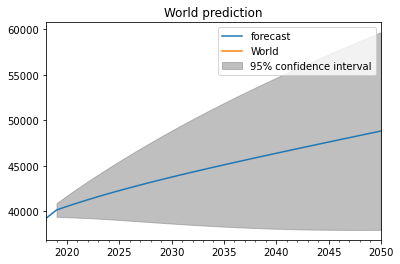

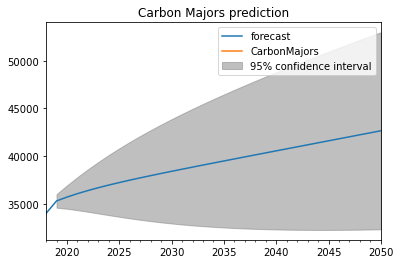

In [284]:
# Import the ARIMA module from statsmodels
from statsmodels.tsa.arima_model import ARIMA

# Forecast Carbon Emissions using an ARIMA(1,1,1) model

#World
mod_W = ARIMA(Emissions['World'], order=(1,1,1))
res_W = mod_W.fit()
# Plot the original series and the forecasted series for the next 30 years
res_W.plot_predict(start='2018-01-01', end='2050-01-01')
plt.title('World prediction')
plt.legend(fontsize=10)

# Carbon Majors
mod_M = ARIMA(CarbonMajors_Year['CarbonMajors'], order=(1,1,1))
res_M = mod_M.fit()
# Plot the original series and the forecasted series for the next 30 years
res_M.plot_predict(start='2018-01-01', end='2050-01-01')
plt.title('Carbon Majors prediction')
plt.legend(fontsize=10)
plt.show()

## Analysis of Carbon Majors

In [277]:
#Read the data from the csv file extracted from the Carbon Majors database established by Rick Heede of the Climate Accountability Institute
Emissions2 = pd.read_csv("Majors.csv", header=0, index_col=0)

In [278]:
#Create a Carbon_Majors dataset by dropping the World Data
Carbon_Majors = Emissions2.drop('World', axis=1)

In [196]:
#Create a Carbon_Majors dataset by dropping the World Data
Majors_CumulEntity = Carbon_Majors.sum()
#Rename the column with the emissions cumul data 'Cumul'
Majors_CumulEntity = Majors_CumulEntity.to_frame('Cumul')

### Top 20 Carbon Majors

##### The top 10 carbon companies are the principal emitters of carbon emissions with a cumulative total of about 745 billion tons since 1870
##### The next 10 carbon companies have a much lower cumlative total of about 185 billion tons since 1870

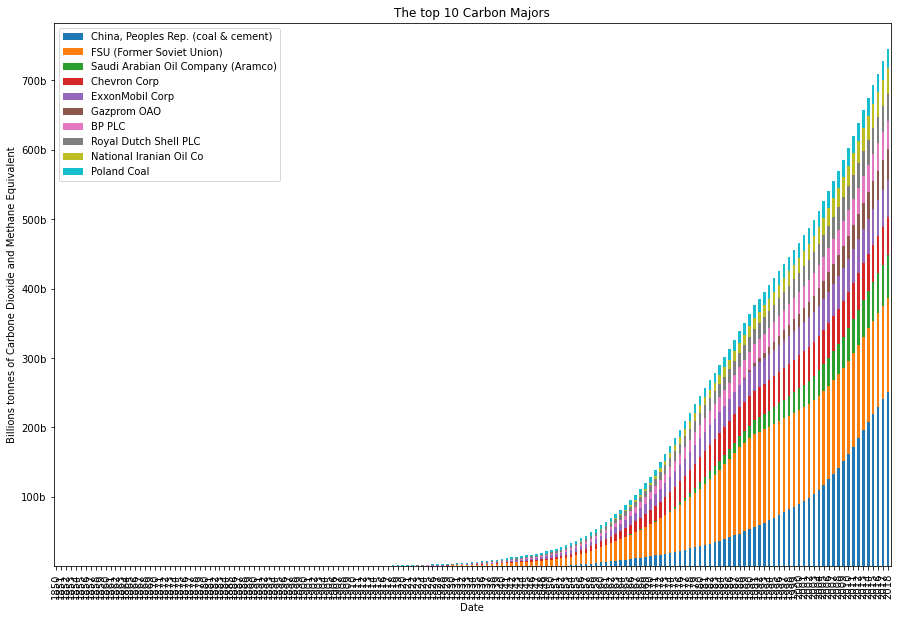

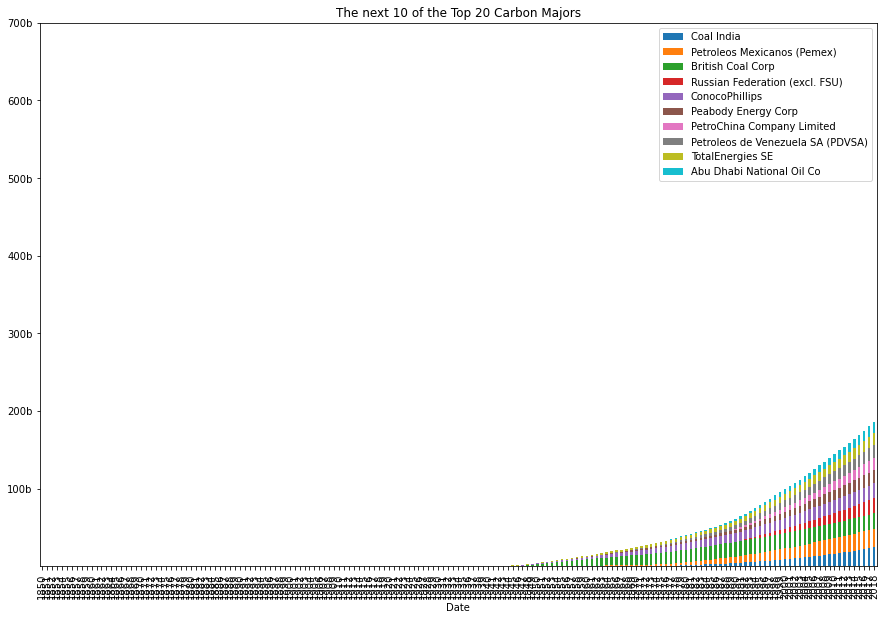

In [199]:
Top10 = Majors_CumulEntity['Cumul'].sort_values(ascending=False)[0:10]
TopNext10 = Majors_CumulEntity['Cumul'].sort_values(ascending=False)[10:20]
Top20 = Majors_CumulEntity['Cumul'].sort_values(ascending=False)[0:20]

Top10_List = Top10.index
TopNext10_List = TopNext10.index
Top20_List = Top20.index

MajorsTop10 = Carbon_Majors[Top10.index].cumsum()
MajorsTopNext10 = Carbon_Majors[TopNext10.index].cumsum()

MajorsTop10.plot.bar(stacked=True,figsize=(15,10))
plt.yticks([100000, 200000, 300000, 400000, 500000, 600000, 700000],['100b', '200b', '300b', '400b', '500b', '600b', '700b'])
plt.ylabel('Billions tonnes of Carbone Dioxide and Methane Equivalent')
plt.title('The top 10 Carbon Majors Emissions since 1870')

MajorsTopNext10.plot.bar(stacked=True,figsize=(15,10))
plt.yticks([100000, 200000, 300000, 400000, 500000, 600000, 700000],['100b', '200b', '300b', '400b', '500b', '600b', '700b'])
plt.title('The next 10 of the Top 20 Carbon Majors Emissions since 1870')
plt.show()

### Ownership of the Carbon Majors

##### 74% of the Top20 Carbon Majors are state owned
##### 68% of the 107 Carbon Majors included in this analysis are state owned

<function matplotlib.pyplot.show(close=None, block=None)>

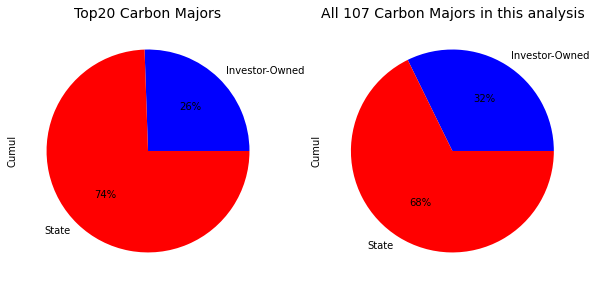

In [274]:
#Read the data from the csv file extracted from the Carbon Majors database established by Rick Heede of the Climate Accountability Institute
Majors_Attributes = pd.read_csv("CarbonMajors_Attributes.csv", header=0, index_col=0)

#Merge DataFrame Majors_CumulEntity with Majors_Attributes on Majors_Attributes.index
CumulMajors = Majors_CumulEntity.merge(Majors_Attributes, on=Majors_Attributes.index)

#Sort the 20 first Majors in the DataFrame CumulMajors and place it in CumulTop20
CumulTop20 = CumulMajors.sort_values(by='Cumul', ascending=False)[0:20]

#Create a Pie chart showing the ownership of the Top20 Carbon Majors
plt.subplot(1,2,1)
Ownership_Top20 = CumulTop20.groupby('Ownership')['Cumul'].sum()
Ownership_Top20.plot.pie( autopct='%.0f%%', colors=('blue', 'red'), figsize=(10,8))
plt.title('Top20 Carbon Majors', fontsize=14)
plt.show

#Create a Pie chart showing the ownership of the 108 Carbon Majors
plt.subplot(1,2,2)
Ownership = CumulMajors.groupby('Ownership')['Cumul'].sum()
Ownership.plot.pie( autopct='%.0f%%', colors=('blue', 'red'), figsize=(10,8))
plt.title('All 107 Carbon Majors in this analysis', fontsize=14)
plt.show

### The top 20 Carbon Companies Emissions since 1870

##### The top 20 carbon companies have contributed 930bn tonnes of Carbone Dioxide equivalent since 1870
##### They are in majority State Owned by developping countries part of the Non-Annex 1 Parties of the United Nations Framework Convention on Climate Change

Text(0.5, 1.0, 'The top 20 Carbon Majors Emissions since 1870')

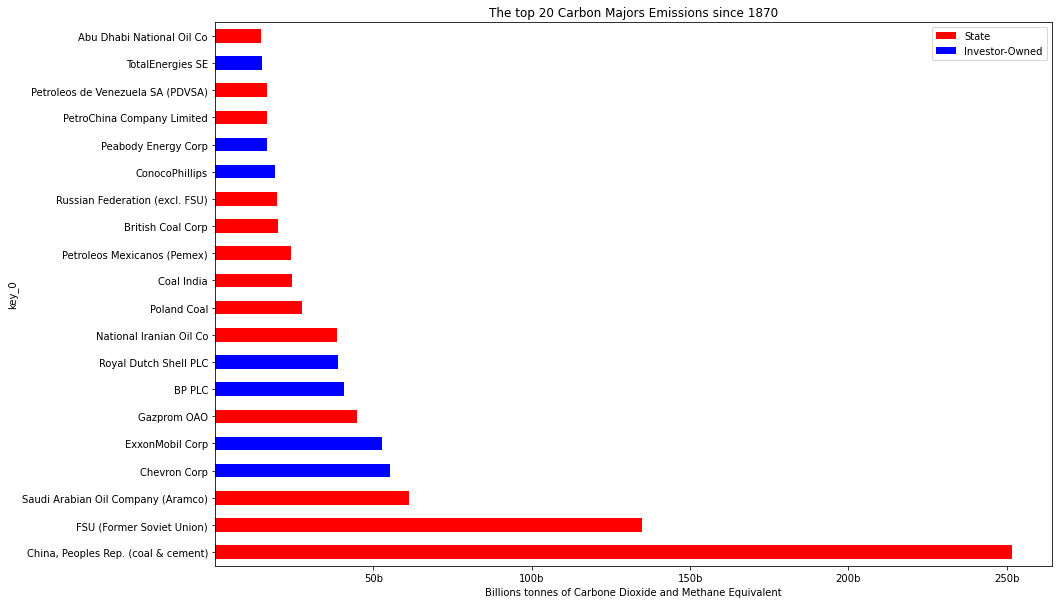

In [301]:
#Set the column 'key_0' showing the Majors name to become the index
Cumul_Top20 = CumulTop20.set_index('key_0')

from matplotlib.patches import Patch
colours = {'State': "red", 'Investor-Owned': "blue"}
Cumul_Top20['Cumul'].plot(
        kind="barh", figsize=(15,10), color=Cumul_Top20['Ownership'].replace(colours)
).legend(
    [
        Patch(facecolor=colours['State']),
        Patch(facecolor=colours['Investor-Owned'])
    ], ["State", "Investor-Owned"]
)


plt.xticks([50000, 100000, 150000, 200000, 250000],['50b', '100b', '150b', '200b', '250b'])
plt.xlabel('Billions tonnes of Carbone Dioxide and Methane Equivalent')
plt.title('The top 20 Carbon Majors Emissions since 1870')